## ANN - Example 2
This code is from "Python - All in one for Dummies" by John Shovic and Alan Simpson

In [1]:
# this example uses the Fashion_MNIST data
# https://github.com/zalandoresearch/fashion-mnist 
# the images are 28x28

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data
from PIL import Image

In [3]:
# Import Fashion MNIST
# note that onehotencoding is performed
# if you do not have the correct path, it downloads regular MNIST and not fashion dataset ?
fashion_mnist = input_data.read_data_sets('ann_example2_data/fashion', one_hot=True)

fashion_mnist = tf.keras.datasets.fashion_mnist

# setup training and test datasets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# set descriptive names to the ten classes within the Fashion_MNIST data.
class_names = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# the images are gray-scale. We will normalize the values to [0-1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# set the ANN model
model = tf.keras.Sequential()
# they are 28x28 images
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu' ))
model.add(tf.keras.layers.Dense(10, activation='softmax' )) 

# compile the model
# Sparse categorical crossentropy is a loss function used to measure the error between categories across the data set. 
# Categorical refers to the fact that the data has more than two categories (binary) in the data set. 
# Sparse refers to using a single integer to refer to classes (0–9, in our example). 
# Entropy (a measure of disorder) refers to the mix of data between the categories.
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# fit the model
history = model.fit(train_images, train_labels, epochs=5)



Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ann_example2_data/fashion\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ann_example2_data/fashion\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ann_example2_data/fashion\t10k-images-idx3-ubyte.gz
Extracting ann_example2_data/fashion\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/5
60000/60000 [==============================] - 52s 867us/sample - loss: 0.5054 - acc: 0.8217
Epoch 2/5
60000/6000

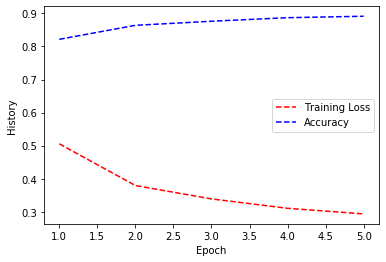

In [4]:
# Get training and test loss histories
training_loss = history.history['loss']
accuracy = history.history['acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(0)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, accuracy, 'b--')
plt.legend(['Training Loss', 'Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('History')
plt.show(block=False);
plt.pause(0.001)


In [5]:
# evaluate the model, test with 10,000 images to calculate the model score
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 6s 604us/sample - loss: 0.3408 - acc: 0.8762


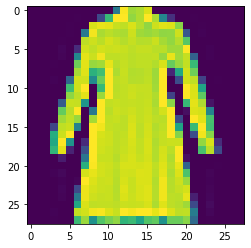

In [26]:
# now we will test the model using a single test image from Fashion_MNIST dataset
# run test image from Fashion_MNIST data
img = test_images[182]

plt.figure(1)
plt.imshow(img)
plt.show(block=False)
plt.pause(0.001)


In [27]:
img = (np.expand_dims(img,0))

singlePrediction = model.predict(img,steps=1)
print ("Prediction Output")
print(singlePrediction)
print()

Prediction Output
[[3.1890769e-02 8.5685337e-05 1.5798641e-02 7.2340047e-01 5.2208725e-02
  2.2938336e-07 1.7474258e-01 5.2564463e-08 1.8707609e-03 2.1918879e-06]]



In [28]:
NumberElement = singlePrediction.argmax()
Element = np.amax(singlePrediction)
print ("Our Network has concluded that the image number '15' is a " +class_names[NumberElement])
print (str(int(Element*100)) + "% Confidence Level")
print('Test accuracy', test_acc)

Our Network has concluded that the image number '15' is a Dress
72% Confidence Level
Test accuracy 0.8762


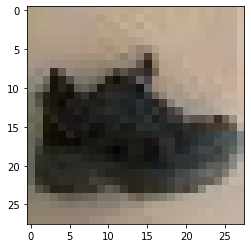

In [29]:
# now we will use an external image to test the model
# read test dress image
# the image is modified using Paint3D
# https://answers.microsoft.com/en-us/insider/forum/all/how-do-i-change-the-file-size-and-resolution-of-an/8c588a74-e32b-4986-a764-050511f82af6
imageName = "ann_example2_data/test_image1.jpg"
testImg = Image.open(imageName)

plt.figure(2)
plt.imshow(testImg)
plt.show(block=False)
plt.pause(0.001)


In [30]:
testImg.load()

data = np.asarray( testImg, dtype="float" )
data = tf.image.rgb_to_grayscale(data)
data = data/255.0
data = tf.transpose(data, perm=[2,0,1])

singlePrediction = model.predict(data,steps=1)
print ("Prediction Output")
print(singlePrediction)
print()

NumberElement = singlePrediction.argmax()
Element = np.amax(singlePrediction)
print ("Our Network has concluded that the file '" +imageName+"' is a "+class_names[NumberElement])
print (str(int(Element*100)) + "% Confidence Level")
plt.show()

Prediction Output
[[5.47603190e-01 1.75455384e-08 1.16531339e-06 1.40842079e-04
  1.08009757e-09 6.98168523e-10 4.38878499e-02 1.13508175e-14
  4.08367008e-01 1.74745585e-09]]

Our Network has concluded that the file 'ann_example2_data/test_image1.jpg' is a T-shirt/top
54% Confidence Level


In [ ]:
# CONCLUSION
# while the ANN model works well for the test dataset, it does not generalize for real life samples.
# It is better to use CNN for image recognition.